# <center>BANK DATA ANALYSIS

In [72]:
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt


In [73]:
df = pd.read_csv("bank_data.csv")
df

C:\Users\uppada satwik\AppData\Local\Temp\ipykernel_31216\260373101.py:1: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bank_data.csv")


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


## Data cleaning

In [74]:
df = pd.read_csv("bank_data.csv",skiprows=2) # skip_blank_lines, skipfooter,skipinitialspace
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [75]:
df.drop('customerid',axis=1,inplace=True)
df

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [76]:
df['job']= df.jobedu.apply(lambda x : x.split(",")[0])
df

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar


In [77]:
df[['job', 'edu']] = df['jobedu'].str.split(',', expand=True)


In [78]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [79]:
df.drop('jobedu',axis=1,inplace=True)

In [80]:
df.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary


In [81]:
df[['months','year']]=df['month'].str.split(",",expand=True)


In [82]:
df.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,edu,months,year
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,...,261 sec,1,-1,0,unknown,no,management,tertiary,may,2017
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,...,151 sec,1,-1,0,unknown,no,technician,secondary,may,2017


In [83]:
percentage_missing = (df.isnull().sum() / len(df)) * 100
percentage_missing

age         0.044237
salary      0.000000
balance     0.000000
marital     0.000000
targeted    0.000000
default     0.000000
housing     0.000000
loan        0.000000
contact     0.000000
day         0.000000
month       0.110593
duration    0.000000
campaign    0.000000
pdays       0.000000
previous    0.000000
poutcome    0.000000
response    0.066356
job         0.000000
edu         0.000000
months      0.110593
year        0.110593
dtype: float64

# Dropping the null valeus in age column

In [84]:
df = df[~df.age.isnull()].copy()

In [85]:
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,edu,months,year
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,...,261 sec,1,-1,0,unknown,no,management,tertiary,may,2017
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,...,151 sec,1,-1,0,unknown,no,technician,secondary,may,2017
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,...,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,may,2017
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,...,92 sec,1,-1,0,unknown,no,blue-collar,unknown,may,2017
4,33.0,0,1,single,no,no,no,no,unknown,5,...,198 sec,1,-1,0,unknown,no,unknown,unknown,may,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,...,16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary,nov,2017
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,...,7.6 min,2,-1,0,unknown,yes,retired,primary,nov,2017
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,...,18.7833333333333 min,5,184,3,success,yes,retired,secondary,nov,2017
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,...,8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary,nov,2017


In [86]:
df['months'].isna().value_counts()

months
False    45141
True        50
Name: count, dtype: int64

In [87]:
colms = ['months','year']
df[colms]= np.where(df[colms].isna(),df[colms].mode(),df[colms])

In [88]:
df['months'].isna().value_counts()

months
False    45191
Name: count, dtype: int64

In [112]:


df[df['months'].notnull()]



,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,edu,months,year
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,...,261 sec,1,NaN,0,unknown,no,management,tertiary,may,2017
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,...,151 sec,1,NaN,0,unknown,no,technician,secondary,may,2017
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,...,76 sec,1,NaN,0,unknown,no,entrepreneur,secondary,may,2017
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,...,92 sec,1,NaN,0,unknown,no,blue-collar,unknown,may,2017
4,33.0,0,1,single,no,no,no,no,unknown,5,...,198 sec,1,NaN,0,unknown,no,unknown,unknown,may,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,...,16.2833333333333 min,3,NaN,0,unknown,yes,technician,tertiary,nov,2017
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,...,7.6 min,2,NaN,0,unknown,yes,retired,primary,nov,2017
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,...,18.7833333333333 min,5,184.0,3,success,yes,retired,secondary,nov,2017
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,...,8.46666666666667 min,4,NaN,0,unknown,no,blue-collar,secondary,nov,2017


0        True
1        True
2        True
3        True
4        True
         ... 
45206    True
45207    True
45208    True
45209    True
45210    True
Name: months, Length: 45191, dtype: bool

In [89]:
df['months'].value_counts(normalize=True)

months
may    0.305149
jul    0.152353
aug    0.137970
jun    0.118010
nov    0.087783
apr    0.064836
feb    0.058551
jan    0.031024
oct    0.016309
sep    0.012746
mar    0.010533
dec    0.004735
Name: proportion, dtype: float64

In [90]:
df['year'].isna().value_counts()


year
False    45191
Name: count, dtype: int64

In [91]:
duplicate_columns = ['age','response']
duplicates = df[df.duplicated(subset=duplicate_columns,keep=False)]
duplicates.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,edu,months,year
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,...,261 sec,1,-1,0,unknown,no,management,tertiary,may,2017
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,...,151 sec,1,-1,0,unknown,no,technician,secondary,may,2017
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,...,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,may,2017
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,...,92 sec,1,-1,0,unknown,no,blue-collar,unknown,may,2017
4,33.0,0,1,single,no,no,no,no,unknown,5,...,198 sec,1,-1,0,unknown,no,unknown,unknown,may,2017


- -1 indicates missing value!!!
# How do we hanlde this?

## Remember our objective!
- we want the missing values to be ignored in the calculations
- simply make it missing- replace -1 with NaN
- all summary statistics- mean, median, etc. will ignore the missing values
- Missing values doesn't have to presemt as null

In [92]:
df.pdays.describe()


count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [93]:
df.loc[df.pdays<0,"pdays"] = np.NaN
df.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [95]:
df.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

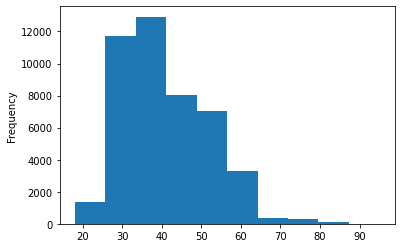

In [94]:
df.age.plot.hist()
plt.show()


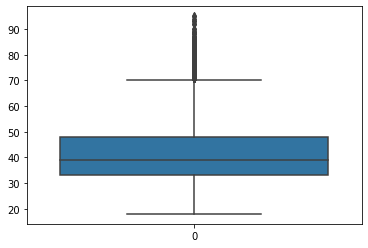

In [96]:
sb.boxplot(df.age)
plt.show()

In [97]:
df.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

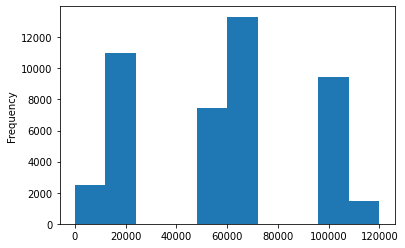

In [99]:
df.salary.plot.hist()
plt.show()

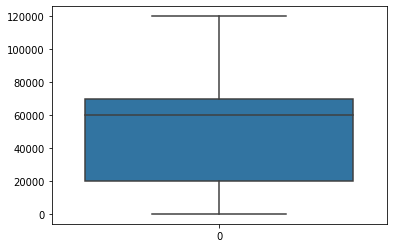

In [100]:
sb.boxplot(df.salary)
plt.show()

In [101]:
df.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

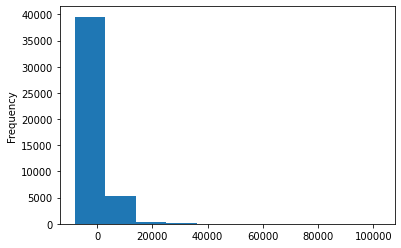

In [104]:
df.balance.plot.hist()
plt.show()

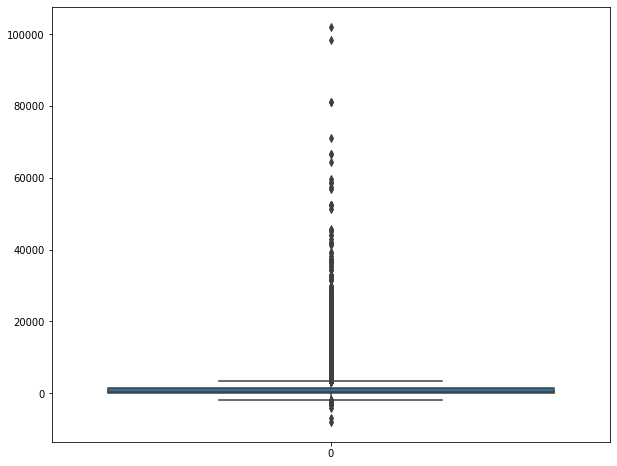

In [107]:
plt.figure(figsize=(10,8))
sb.boxplot(df.balance)
plt.show()